## Generate random data

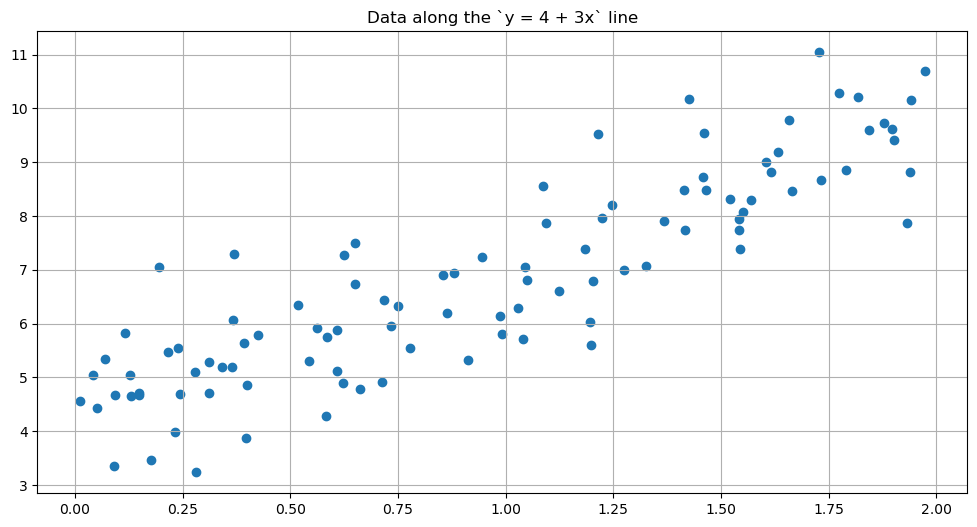

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.scatter(X, y)
ax.set_title("Data along the `y = 4 + 3x` line")
display()

In [32]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

## The Normal equation: closed-form solution of best Theta (theta-hat)

In [41]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("First step (2x2):")
display(X_b.T @ X_b)

print("First step, inverted (2x2):")
display(np.linalg.inv(X_b.T @ X_b))

print("Second step (2x100):")
display(np.linalg.inv(X_b.T @ X_b) @ X_b.T)

print("Third step 2x1):")
display(theta_best)
display(theta_best.shape)

First step (2x2):


array([[100.        ,  94.03614868],
       [ 94.03614868, 123.47395265]])

First step, inverted (2x2):


array([[ 0.03523199, -0.02683222],
       [-0.02683222,  0.02853394]])

Second step (2x100):


array([[ 0.0151325 , -0.01578757, -0.00405006,  0.00310531,  0.02685933,
         0.02686063,  0.03211496, -0.01125087,  0.00297349, -0.00276633,
         0.03412733, -0.01681768, -0.00944058,  0.02383693,  0.02547445,
         0.02538969,  0.018905  ,  0.00707123,  0.0120519 ,  0.01960334,
         0.00239724,  0.02774613,  0.01955421,  0.01557138,  0.01075725,
        -0.00690404,  0.02451661,  0.00763588,  0.00344039,  0.03273925,
         0.00262843,  0.02608091,  0.03174103, -0.01568943, -0.01658812,
        -0.00815021,  0.01888506,  0.02999047, -0.001487  ,  0.01161145,
         0.02868287,  0.00865859,  0.03338655, -0.01356618,  0.0213447 ,
        -0.0003219 ,  0.01850419,  0.00732283,  0.00589309,  0.02531188,
        -0.01680023, -0.00636508, -0.0151857 , -0.01278842,  0.00314602,
        -0.01423988,  0.03048309,  0.02471468,  0.03280489,  0.01777332,
         0.01437384,  0.02067019, -0.00924175,  0.01608702,  0.02015579,
         0.0061085 ,  0.02766937, -0.00781747,  0.0

Third step 2x1):


array([[4.21509616],
       [2.77011339]])

(2, 1)

## Using theta-hat to predict y-hat

In [48]:
# y_hat = theta_vector • x_vector
# where • is the dot product of the vectors
# In matrix form, this seems to be: X_matrix @ theta_vector
# where each row of the X_matrix is a separate x_vector
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_hat = X_new_b @ theta_best
y_hat

array([[4.21509616],
       [9.75532293]])

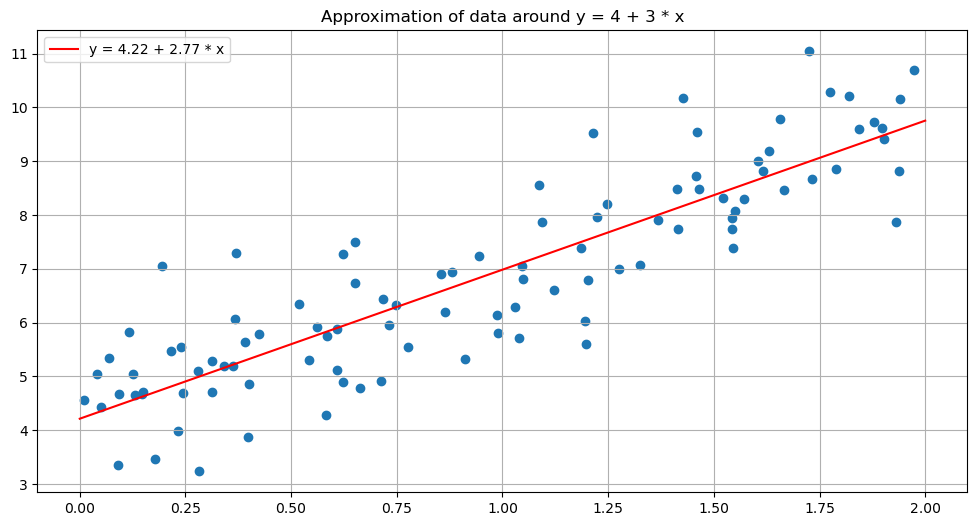

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot([0, 2], y_hat, label="y = {:.2f} + {:.2f} * x".format(*theta_best.flatten().tolist()), c="red")
ax.scatter(X, y)
ax.set_title("Approximation of data around y = 4 + 3 * x")
ax.grid()
ax.legend(loc="upper left")
display()

## Using Scikit-learn linear regression

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("y = {:.2f} + {:.2f} * x".format(lin_reg.intercept_[0], lin_reg.coef_.flatten()[0]))
lin_reg.predict(X_new)

y = 4.22 + 2.77 * x


array([[4.21509616],
       [9.75532293]])

## Using home-made Gradient Descent

In [80]:
eta = 0.1           # learning rate
n_epochs = 1000     # an epoch is one "step of descent" along the gradient, considering all rows in X
m = len(X_b)        # number of instances

np.random.seed(42)
curr_theta = np.random.randn(2, 1)   # Randomly initialize model parameters

for epoch in range(n_epochs):
    # Based on equation 4-6: gradient vector of the cost function
    gradients = 2 / m * X_b.T @ (X_b @ curr_theta - y)
    # Based on equation 4-7: gradient descent step
    curr_theta = curr_theta - eta * gradients

print("GD theta:")
display(curr_theta)

print("vs. best theta:")
display(theta_best)

GD theta:


array([[4.21509616],
       [2.77011339]])

vs. best theta:


array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [82]:
# In each epoch, we go through m randomly selected instances, using a single instance each time
# to take a step towards the gradient. Due to its jittery nature, the learning rate is decreasing
# according to a learning schedule

n_epochs = 50
t0, t1 = 5, 50   # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
curr_theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        # Similar to earlier, though note we do not divide by m
        gradients = 2 * xi.T @ (xi @ curr_theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        # Take a gradient descent step
        curr_theta = curr_theta - eta * gradients

curr_theta

array([[4.21076011],
       [2.74856079]])

## SGD Using scikit-learn's SGDRegressor

In [95]:
from sklearn.linear_model import SGDRegressor

# Run for maximum 1000 epochs (max_iter) or until the loss drops by less than 1e-5 (tol)
# during 100 epochs (n_iter_no_change). Start with a learning rate of 0.01 (eta0), using
# a default learning schedule (not the same as above). Do not use regularization (penalty=None).
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)

# `ravel()` turns y from (100, 1) to (100,)
sgd_reg.fit(X, y.ravel())
print("theta:")
print(sgd_reg.intercept_, sgd_reg.coef_)

print("vs. best theta:")
print(theta_best)

theta:
[4.21278812] [2.77270267]
vs. best theta:
[[4.21509616]
 [2.77011339]]


## Mini-batches
In between Stochastic Gradient Descent (SGD) and Gradient Descent (GD). We pick a random set of k instances to compute the gradient in each step instead of the entire training set (GD) or a single instance (SGD).

## Polynomial Regression

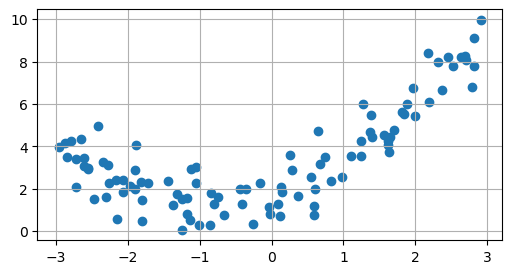

In [35]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter(X, y)
ax.grid()
display()

In [36]:
# We add a square to each feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
display(lin_reg.intercept_)
display(lin_reg.coef_)

array([1.78134581])

array([[0.93366893, 0.56456263]])

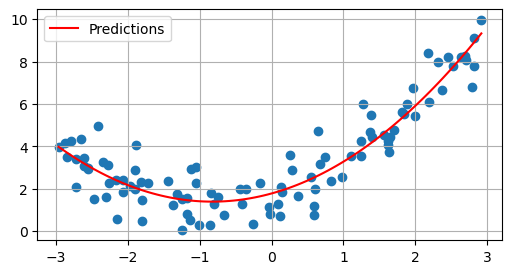

In [38]:
x_hat = np.linspace(min(X), max(X), 100)
x_hat_poly = poly_features.fit_transform(x_hat)
y_hat = lin_reg.predict(x_hat_poly)

fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter(X, y)
ax.plot(x_hat, y_hat, c="red", label="Predictions")
ax.grid()
ax.legend(loc="upper left")
display()

## Learning curves

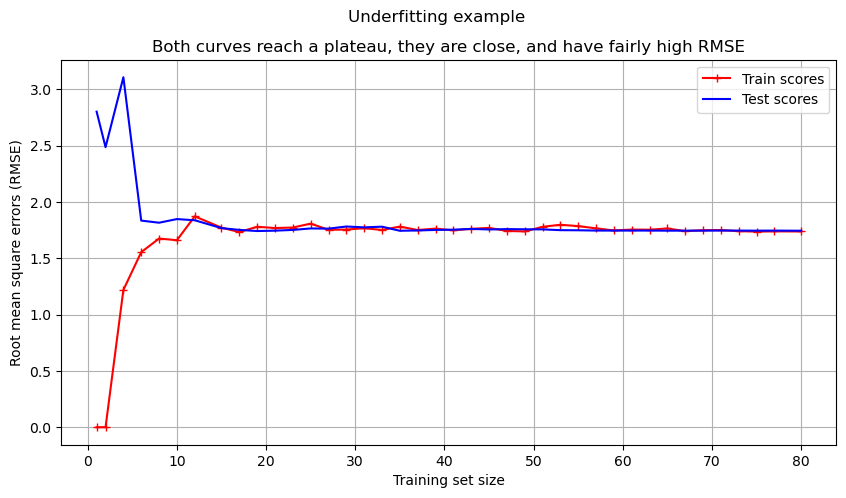

In [91]:
from sklearn.model_selection import learning_curve
mdl = LinearRegression()
train_sizes_abs, train_scores, test_scores = learning_curve(mdl, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Underfitting example")
ax.set_title("Both curves reach a plateau, they are close, and have fairly high RMSE")
ax.set_xlabel("Training set size")
ax.set_ylabel("Root mean square errors (RMSE)")
ax.plot(train_sizes_abs, -train_scores.mean(axis=1), label="Train scores", c="r", marker="+")
ax.plot(train_sizes_abs, -test_scores.mean(axis=1), label="Test scores", c="b")
ax.legend(loc="upper right")
ax.grid()
display()

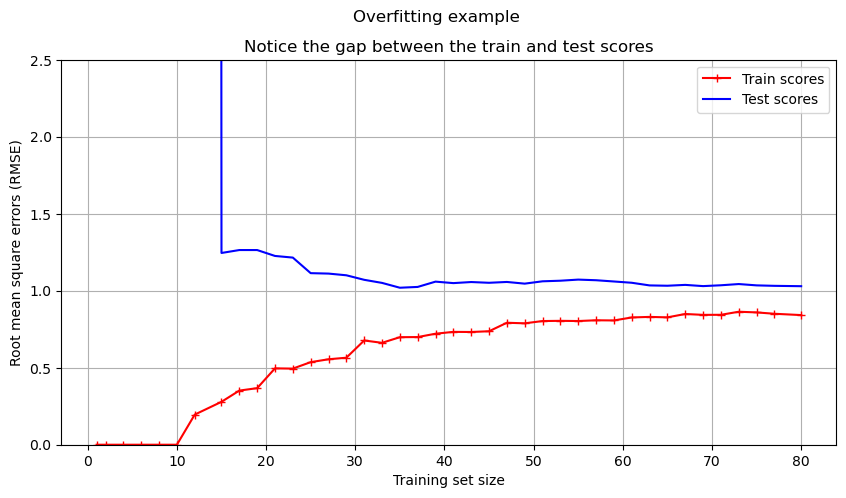

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
mdl = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)
train_sizes_abs, train_scores, test_scores = learning_curve(mdl, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Overfitting example")
ax.set_title("Notice the gap between the train and test scores")
ax.set_xlabel("Training set size")
ax.set_ylabel("Root mean square errors (RMSE)")
ax.set_ylim(0, 2.5)
ax.plot(train_sizes_abs, -train_scores.mean(axis=1), label="Train scores", c="r", marker="+")
ax.plot(train_sizes_abs, -test_scores.mean(axis=1), label="Test scores", c="b")
ax.legend(loc="upper right")
ax.grid()
display()

## Ridge regression (L2 regularization)

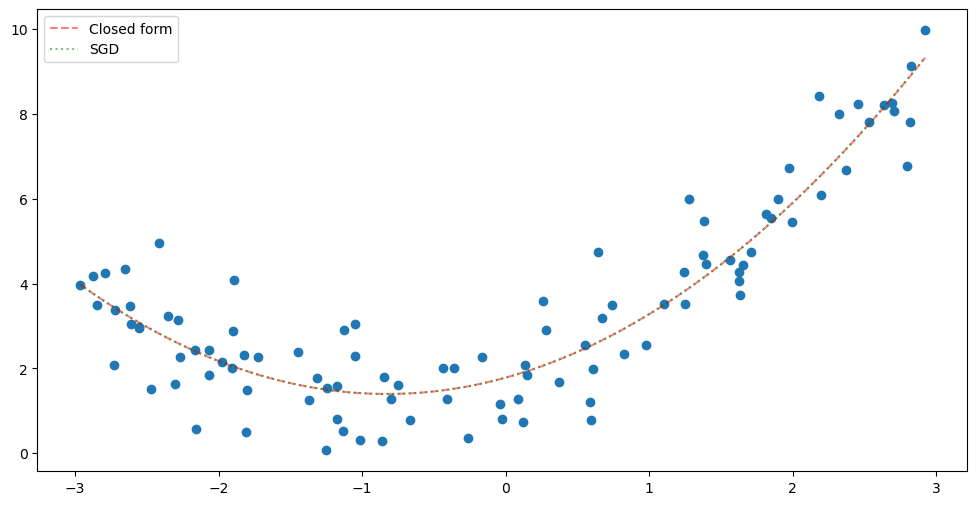

In [122]:
from sklearn.linear_model import Ridge, SGDRegressor
# Recall that L2 regularization changes the cost function to be:
# COST(θ) = MSE(θ) + ⍺*∑θ^2
# In Ridge regression, the cost function is pretty much the same, except that we average the vector:
# COST(θ) = MSE(θ) + ⍺/m*∑θ^2

# = Closed form solution
# Below, alpha is the value we multiply the parameter vector's length by (not including the bias)
# cholesky means closed form solution
ridge_closed = Ridge(alpha=0.1, solver="cholesky")
ridge_closed.fit(X_poly, y)
Y_hat_closed = ridge_closed.predict(x_hat_poly)

# = SGD solution
# SGDRegressor natively allows a penalty of `l2`
# Note that L2 does not divide by number of samples, so we add it here to mimic Ridge
ridge_sgd = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
ridge_sgd.fit(X_poly, y.ravel())
Y_hat_sgd = ridge_sgd.predict(x_hat_poly)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y)
ax.plot(x_hat, Y_hat_closed, c="red", label="Closed form", alpha=0.5, linestyle="--")
ax.plot(x_hat, Y_hat_sgd, c="green", label="SGD", alpha=0.5, linestyle=":")
ax.legend(loc="upper left")
display()

SGD Ridge: intercept=[1.78211323], coef=[0.93420757 0.56518136], alpha=0.1
RidgeCV: intercept=[1.78400638], coef=[[0.9305576  0.56355288]], alpha=1.0, score=0.8368750226962224


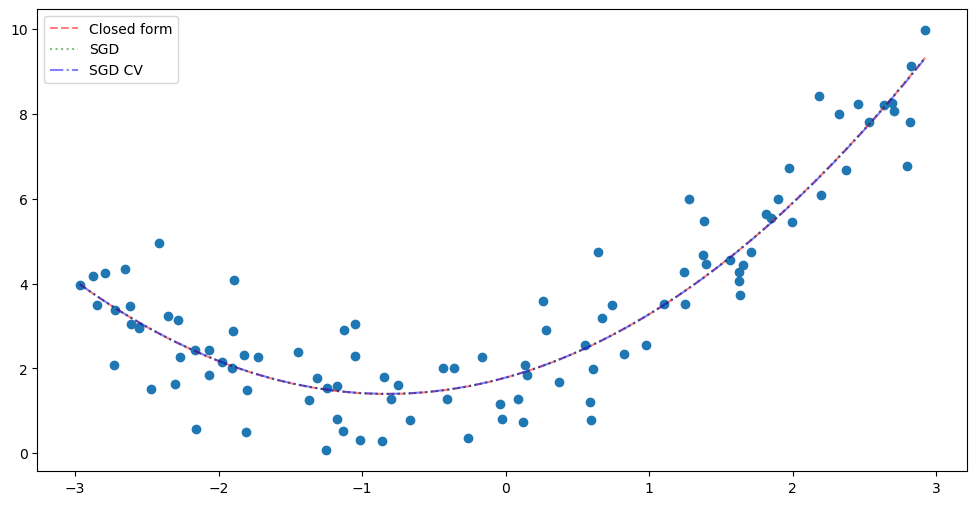

In [146]:
# Trying to use RidgeCV (the book only mentions it)
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0, 15.0), cv=3)
ridge_cv.fit(X_poly, y)
Y_hat_ridge_cv = ridge_cv.predict(x_hat_poly)

print("SGD Ridge: intercept={}, coef={}, alpha=0.1".format(ridge_sgd.intercept_, ridge_sgd.coef_))
print("RidgeCV: intercept={}, coef={}, alpha={}, score={}".format(ridge_cv.intercept_, ridge_cv.coef_, ridge_cv.alpha_, ridge_cv.best_score_))

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y)
ax.plot(x_hat, Y_hat_closed, c="red", label="Closed form", alpha=0.5, linestyle="--")
ax.plot(x_hat, Y_hat_sgd, c="green", label="SGD", alpha=0.5, linestyle=":")
ax.plot(x_hat, Y_hat_ridge_cv, c="blue", label="SGD CV", alpha=0.5, linestyle="-.")
ax.legend(loc="upper left")
display()

## Lasso regression (L1 regularization)

[1.82759877] [0.89934151 0.54811812]
[1.82791684] [0.90041513 0.54872815]


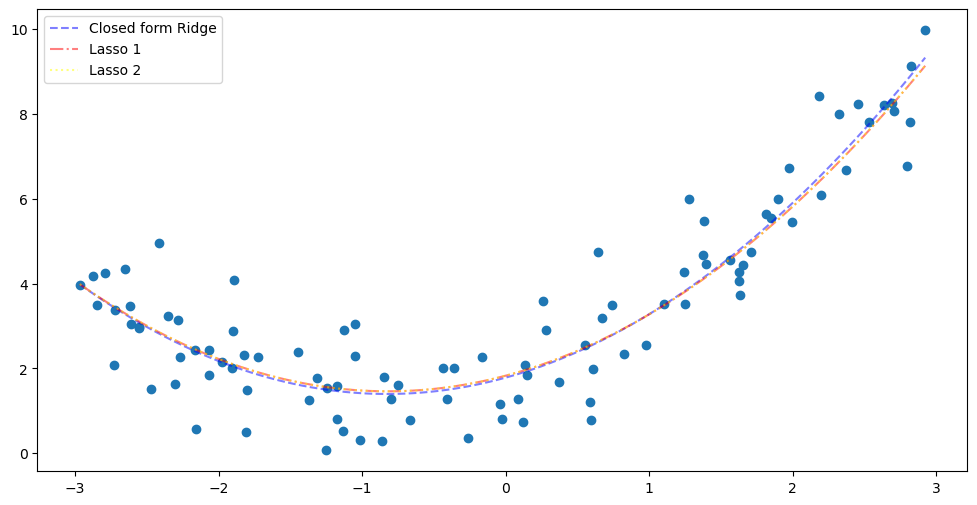

In [159]:
# Lasso
from sklearn.linear_model import Lasso, SGDRegressor

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X_poly, y)
y_hat_lasso1 = lasso1.predict(x_hat_poly)

lasso2 = SGDRegressor(penalty="l1", alpha=0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
lasso2.fit(X_poly, y.ravel())
Y_hat_lasso2 = lasso2.predict(x_hat_poly)

print(lasso1.intercept_, lasso1.coef_)
print(lasso2.intercept_, lasso2.coef_)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y)
ax.plot(x_hat, Y_hat_closed, c="blue", label="Closed form Ridge", alpha=0.5, linestyle="--")
ax.plot(x_hat, y_hat_lasso1, c="red", label="Lasso 1", alpha=0.5, linestyle="-.")
ax.plot(x_hat, Y_hat_lasso2, c="yellow", label="Lasso 2", alpha=0.5, linestyle=":")
ax.legend(loc="upper left")
display()

## Elastic net regularization (average of L1 and L2)
See book. It is preferable over Lasso when number of features > number of instances or when there is a strong correlation between several features.

## Early stopping
See book for usage of `partial_fit` and recording of the minimum MSE in the validation set.

## Bonus: Understanding PolynomialFeatures include_bias

In [166]:
from sklearn.preprocessing import PolynomialFeatures

x_test = np.array([
    [3, 5],
    [2, 4]
])

with_bias = PolynomialFeatures(degree=2, include_bias=True)
without_bias = PolynomialFeatures(degree=2, include_bias=False)
x_test_with_bias = with_bias.fit_transform(x_test)
x_test_without_bias = without_bias.fit_transform(x_test)

display(x_test_with_bias)
display(x_test_without_bias)

array([[ 1.,  3.,  5.,  9., 15., 25.],
       [ 1.,  2.,  4.,  4.,  8., 16.]])

array([[ 3.,  5.,  9., 15., 25.],
       [ 2.,  4.,  4.,  8., 16.]])

# Logistic regression

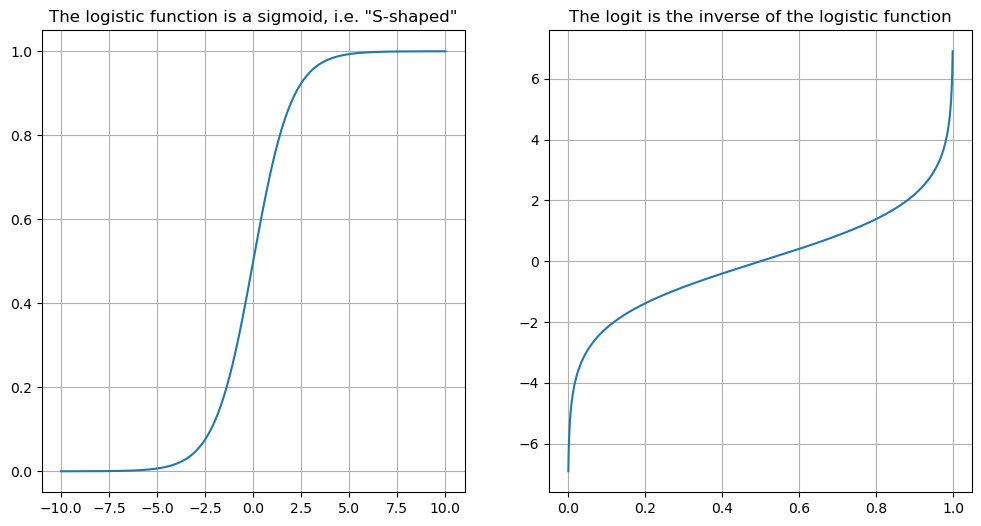

In [190]:
# The sigmoid function σ
def logistic(t):
    return 1 / (1 + np.exp(-t))

def logit(p):
    return np.log(p / (1 - p))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.grid()
ax2.grid()

ax1.set_title("The logistic function is a sigmoid, i.e. \"S-shaped\"")
sig_x = np.linspace(-10, 10, 1000)
# 🤔interesting that a function can be applied on a vector simply by calling it. No need for map!
ax1.plot(sig_x, logistic(sig_x))

ax2.set_title("The logit is the inverse of the logistic function")
logit_x = np.linspace(0.001, 0.999, 1000)
ax2.plot(logit_x, logit(logit_x))

display()

In [194]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [195]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [204]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

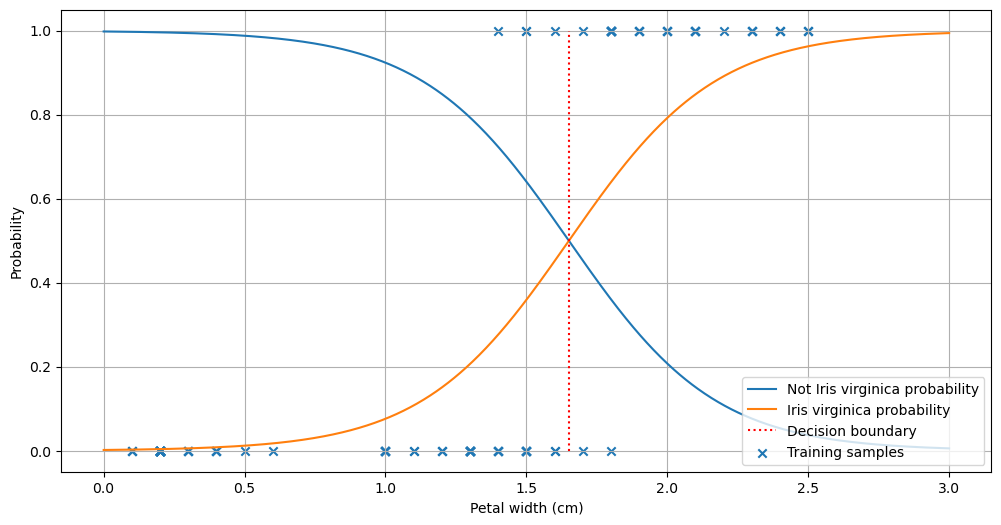

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
# 🤔interesting that index resolution can be done in vector format in pandas
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_chart = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_chart)[:, 1]
first_true = (y_proba >= 0.5).argmax()
decision_boundary = X_chart[first_true]
decision_boundary

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.set_xlabel("Petal width (cm)")
ax.set_ylabel("Probability")
ax.plot(X_chart, 1-y_proba, label="Not Iris virginica probability", linestyle="-")
ax.plot(X_chart, y_proba, label="Iris virginica probability", linestyle="-")
ax.vlines(decision_boundary, 0, 1, label="Decision boundary", linestyle=":", color="red")
ax.scatter(X_train, y_train, label="Training samples", marker="x")
ax.legend(loc="lower right")
display()

## Using soft-max
When X has multiple classes, LinearRegression automatically applies a softmax.
It first trains a model on **each class** to predict the probability. Then, for each instance it calculates the relative exponent of each class:
For a particular instance, softmax of class k := exp(P(k)) / ∑exp(P(k))
whereas the ∑ is summing across classes.

This vector can be retrieved using `predict_proba`. When calling `predict` it simply takes the argmax of those.

In [284]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# C is the reverse of alpha: higher means lower learning rate
softmax_reg = LogisticRegression(random_state=42, C=30)
softmax_reg.fit(X_train, y_train)
# Prediction example of length=5cm, width=2cm
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])